TASK 2: Simple Data Visualization.
Create a basic bar chart or line chart using a popular Python visualization library like Matplotlib or Seaborn. Visualize key insights from the dataset.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv("netflix_titles_1.csv")
df 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


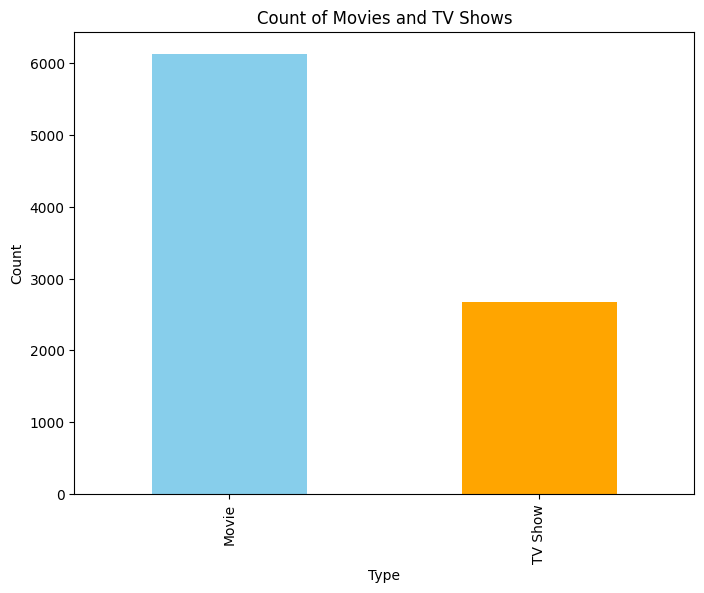

In [3]:
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

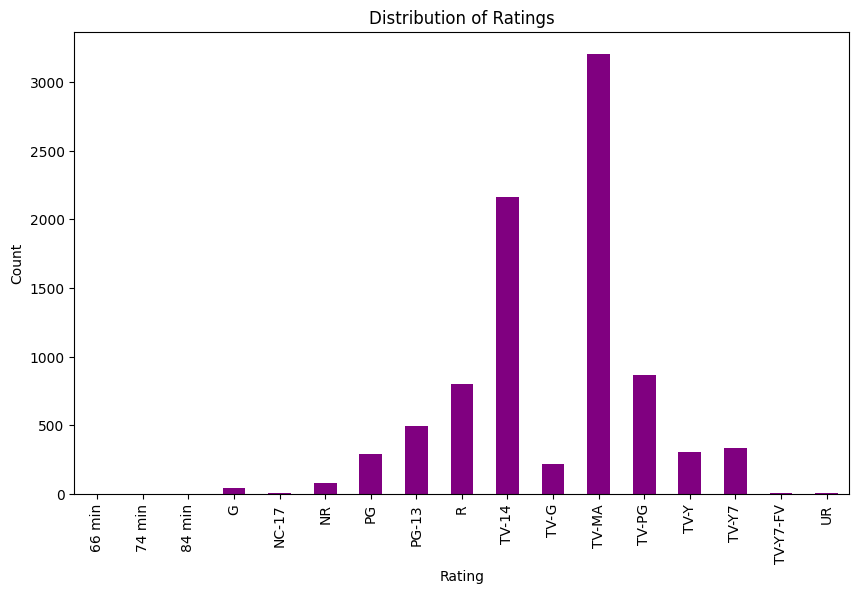

In [24]:
plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

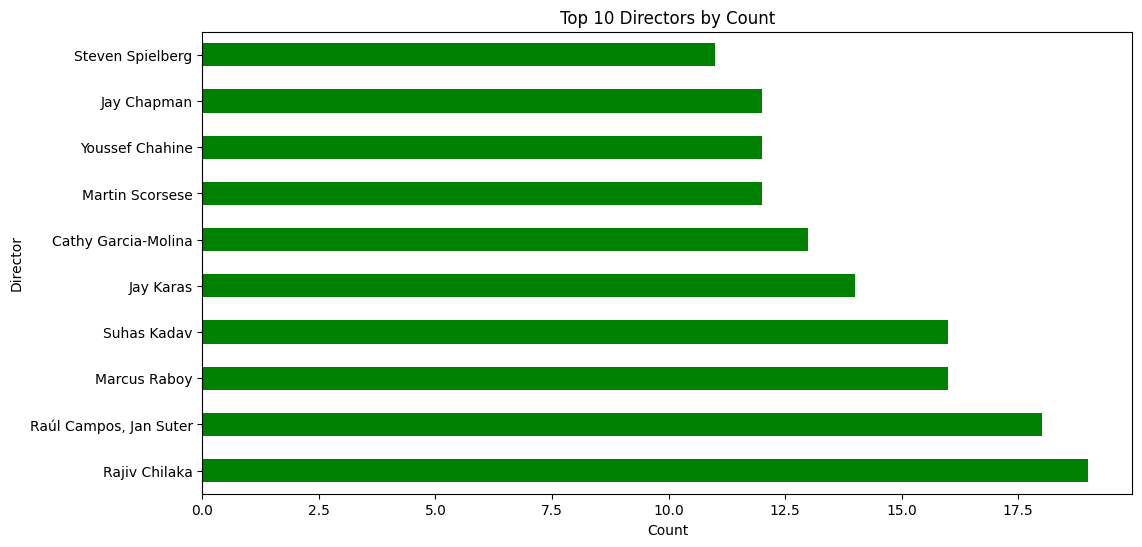

In [5]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_directors.plot(kind='barh', color='green')
plt.title('Top 10 Directors by Count')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

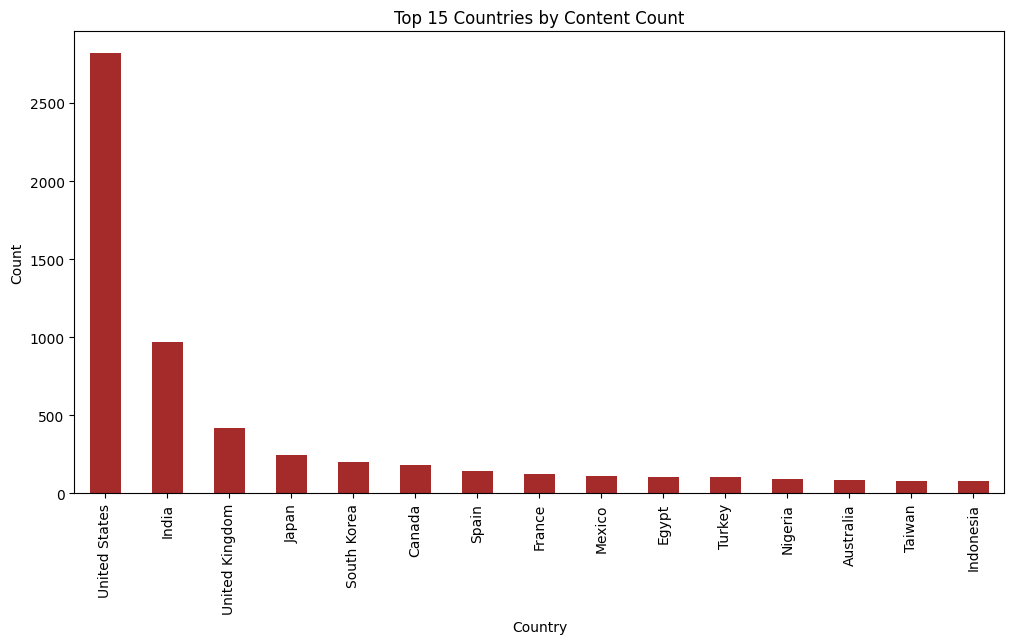

In [22]:
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(15).plot(kind='bar', color='brown')
plt.title('Top 15 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

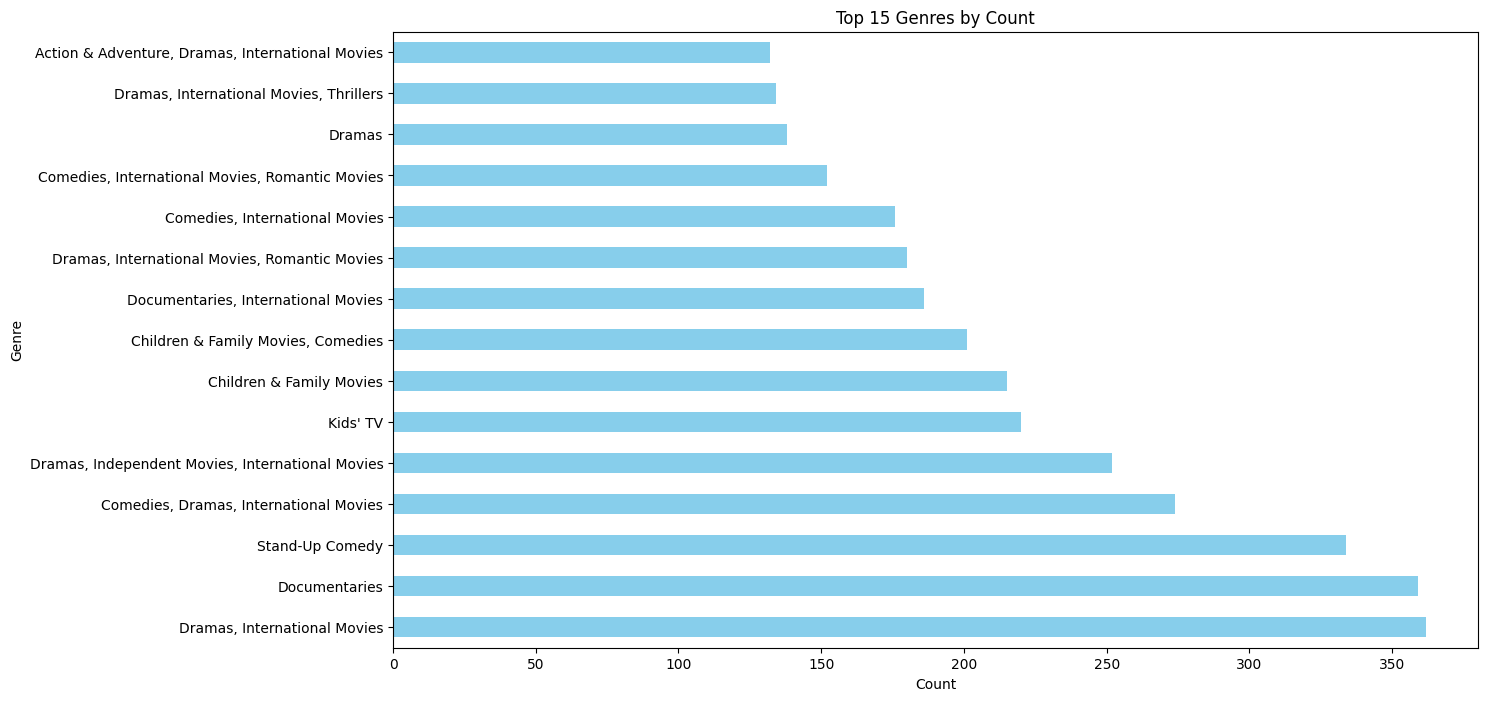

In [7]:
plt.figure(figsize=(14, 8))
df['listed_in'].value_counts().head(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Genres by Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

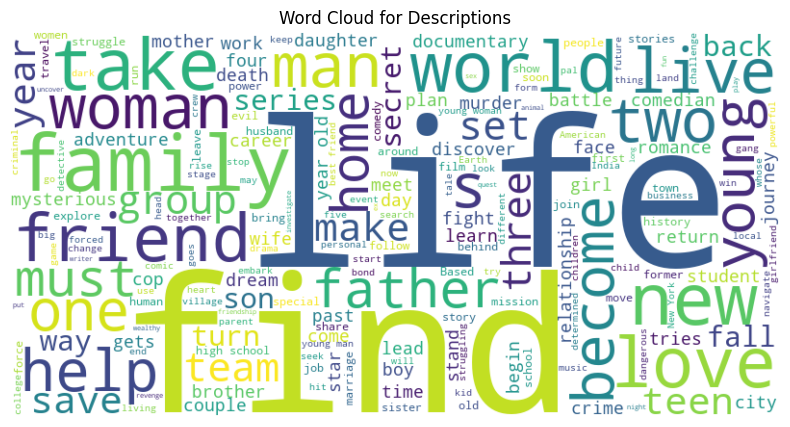

In [8]:
from wordcloud import WordCloud
all_descriptions = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions')
plt.show()

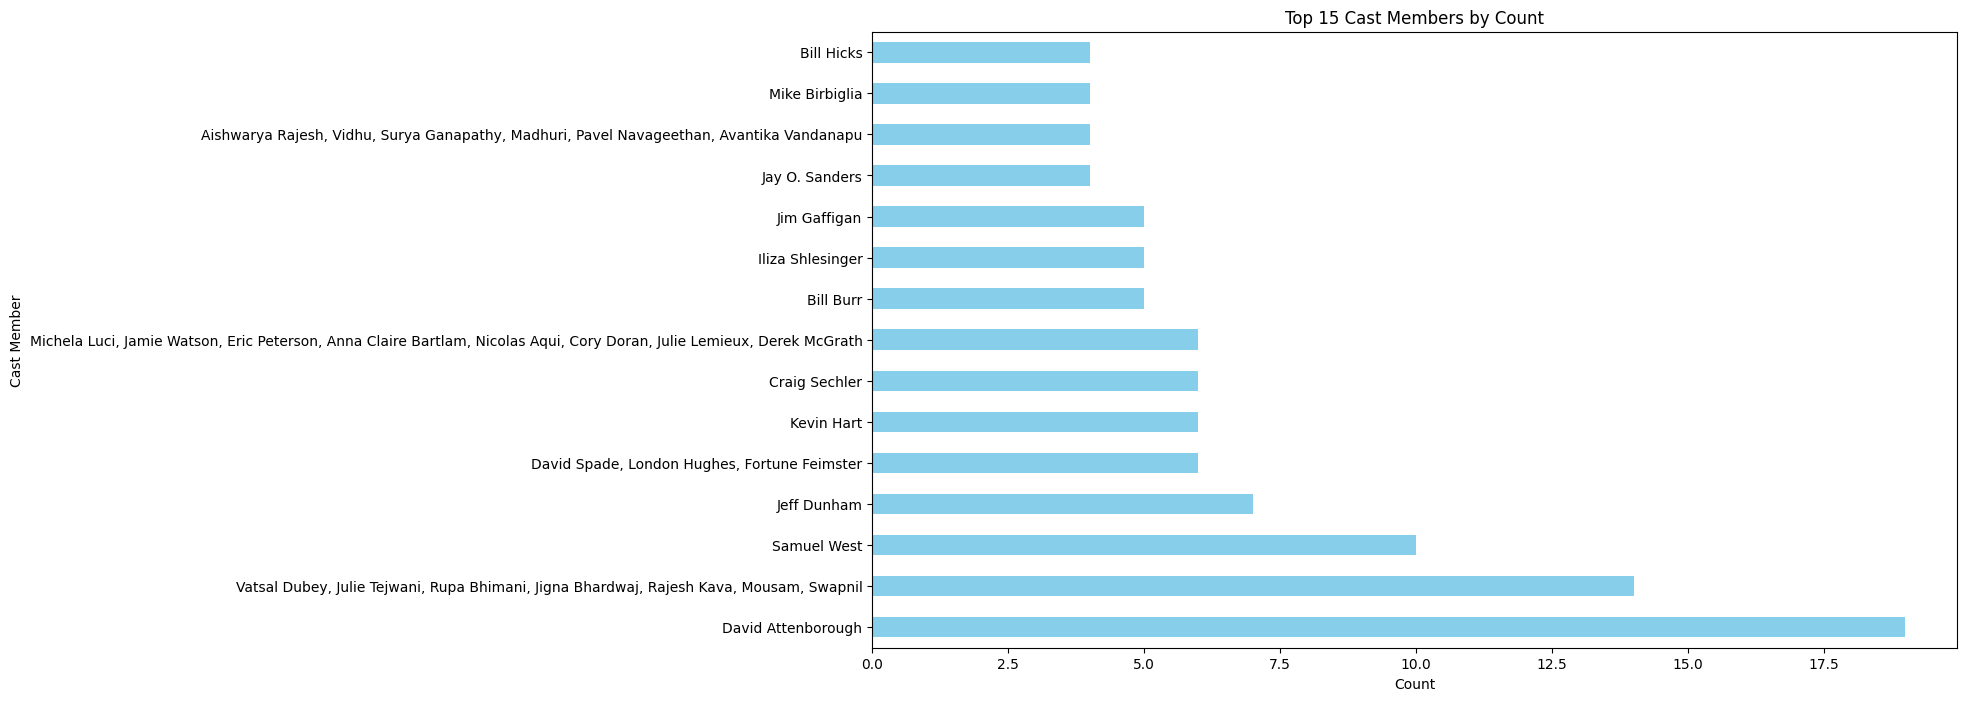

In [10]:
plt.figure(figsize=(14, 8))
df['cast'].value_counts().head(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Cast Members by Count')
plt.xlabel('Count')
plt.ylabel('Cast Member')
plt.show()

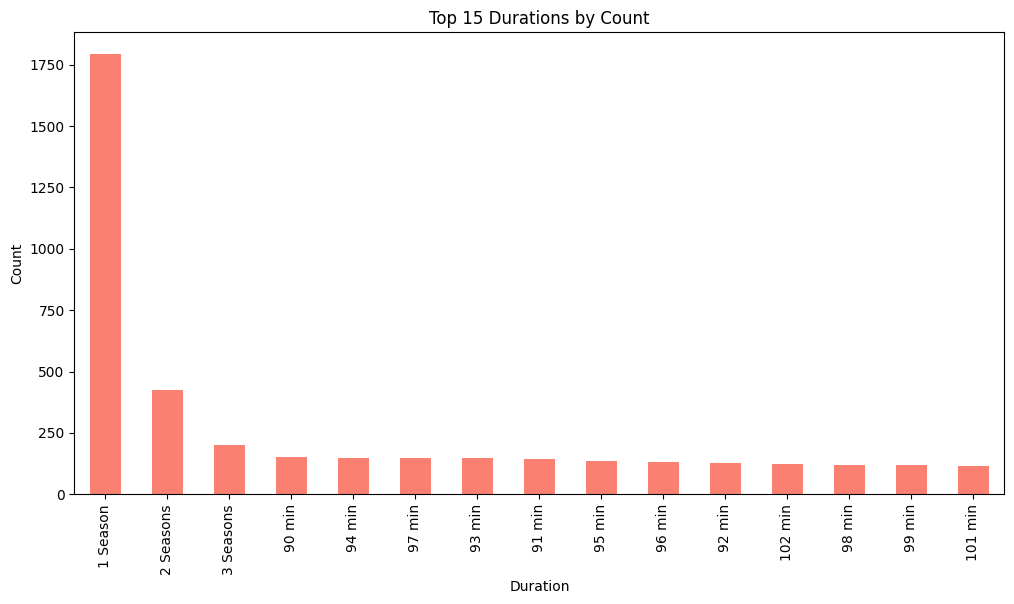

In [17]:
plt.figure(figsize=(12, 6))
df['duration'].value_counts().head(15).plot(kind='bar', color='salmon')
plt.title('Top 15 Durations by Count')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()


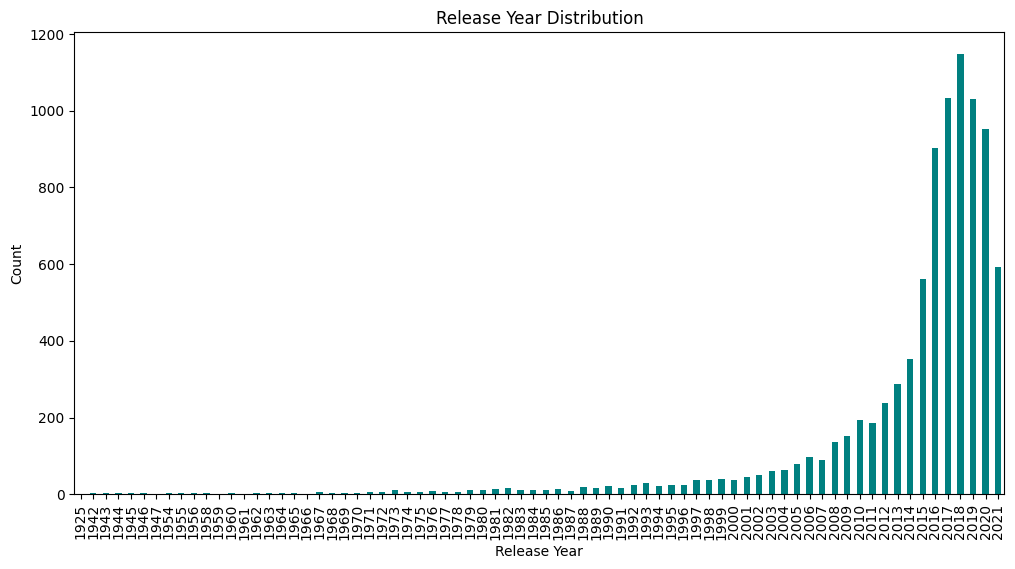

In [18]:
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


<Figure size 1400x600 with 0 Axes>

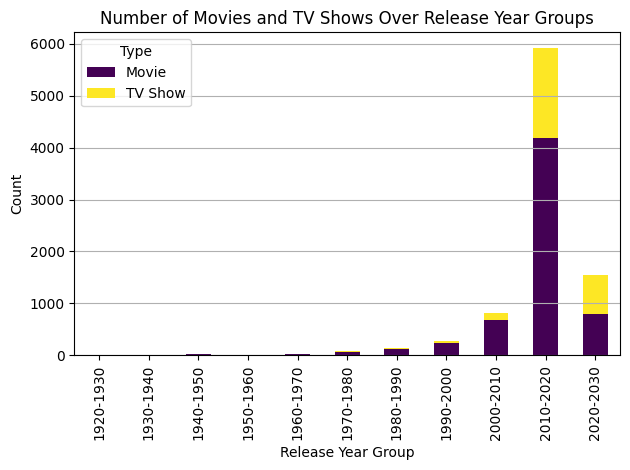

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = [f'{start}-{end}' for start, end in zip(bins[:-1], bins[1:])]
df['release_year_group'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=False)
counts = df.groupby(['release_year_group', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(14, 6))
counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Movies and TV Shows Over Release Year Groups')
plt.xlabel('Release Year Group')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

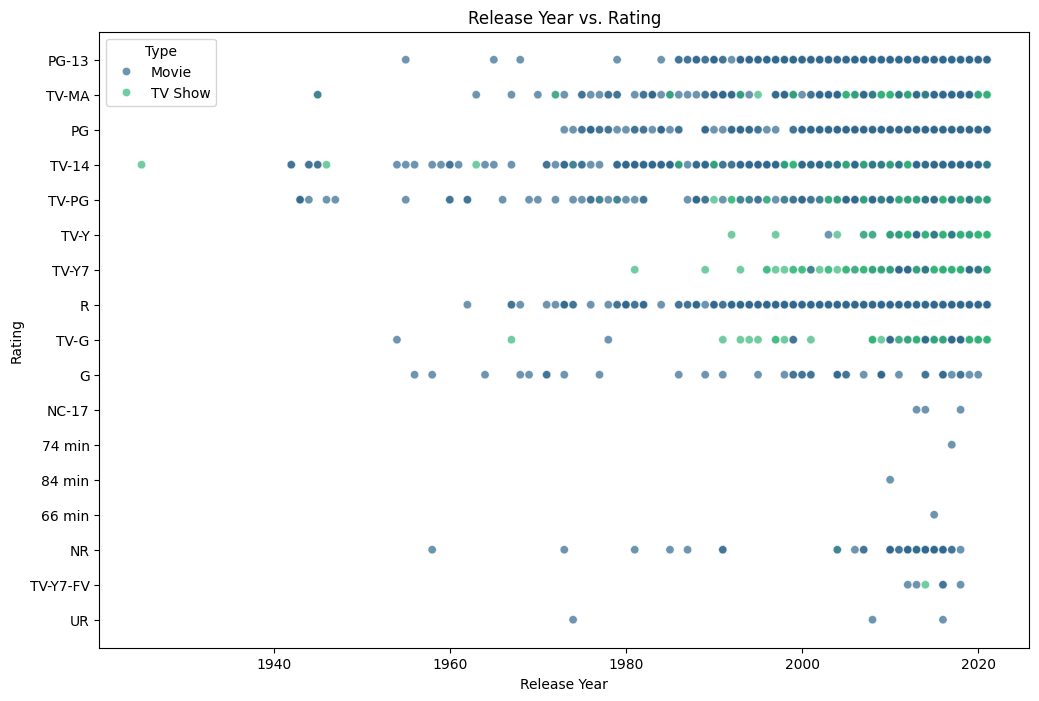

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='rating', data=df, hue='type', palette='viridis', alpha=0.7)
plt.title('Release Year vs. Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show() 

<Axes: title={'center': 'The histogram of types of ratings of content: '}>

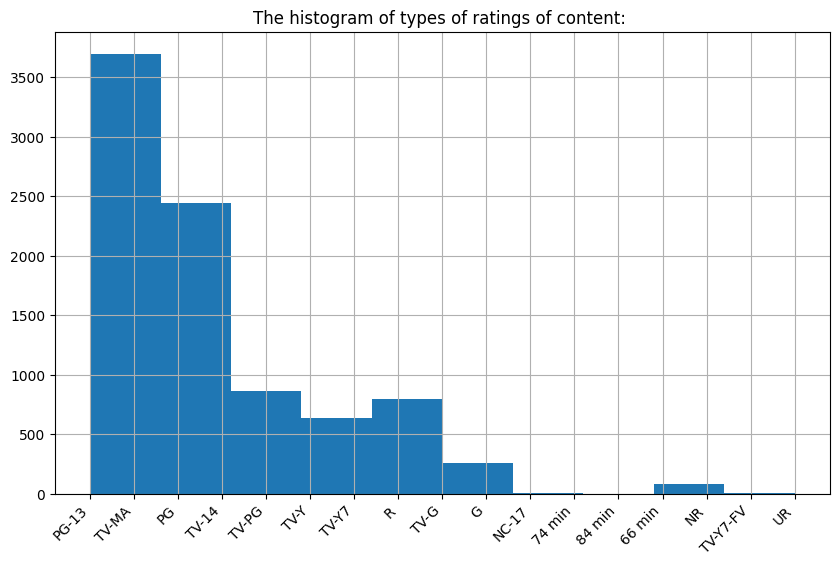

In [49]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right') 
plt.title("The histogram of types of ratings of content: ")
df['rating'].hist()